In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/transaction_data.csv')

In [3]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [4]:
df.shape

(5315, 3)

In [5]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

In [6]:
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [7]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


***
Let's look at `transaction` column. How many observations relate to this or that value?
And visualise it.

In [8]:
df \
    .transaction \
    .value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

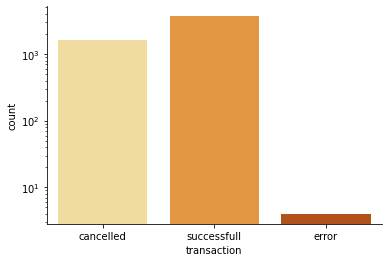

In [9]:
ax = sns.countplot(x='transaction', 
                   data=df, 
                   palette='YlOrBr')
ax.set_yscale('log')
sns.despine()

How many successfull transactions has each user made? Build a histogram to distribute the number of successful transactions.

In [10]:
df_success_tr = df \
                .query('transaction == "successfull"') \
                .groupby('name') \
                .agg({'transaction': 'count'}) 

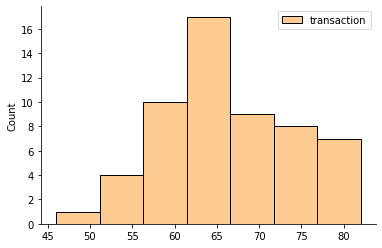

In [11]:
sns.histplot(df_success_tr, color='orange', 
             palette='YlOrBr');
sns.despine()

***
Load one more dataset with user transactions:

In [12]:
df_2 = pd.read_csv('data/transaction_data_updated.csv')

In [13]:
df_2.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


Build a pivot table where user names are used as columns, rows - as minutes, values - as the number of operations performed in the specified minute and fill the missing values with zeros.

In [14]:
df_2_grouped = df_2 \
                .groupby(['name', 'minute'], as_index=False) \
                .agg({'transaction': 'count'}) \
                .rename(columns={'transaction': 'num_of_transactions'})

In [15]:
df_2_grouped

,name,minute,num_of_transactions
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [16]:
users_vs_minute_pivot = df_2_grouped.pivot(index='minute', 
                                           columns=['name'], 
                                           values='num_of_transactions') 

In [17]:
users_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0


In [18]:
users_vs_minute_pivot.fillna(0, inplace=True)

In [19]:
users_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


Build the graph by pivot table:

In [20]:
tr_by_minutes = users_vs_minute_pivot.sum(axis=1)

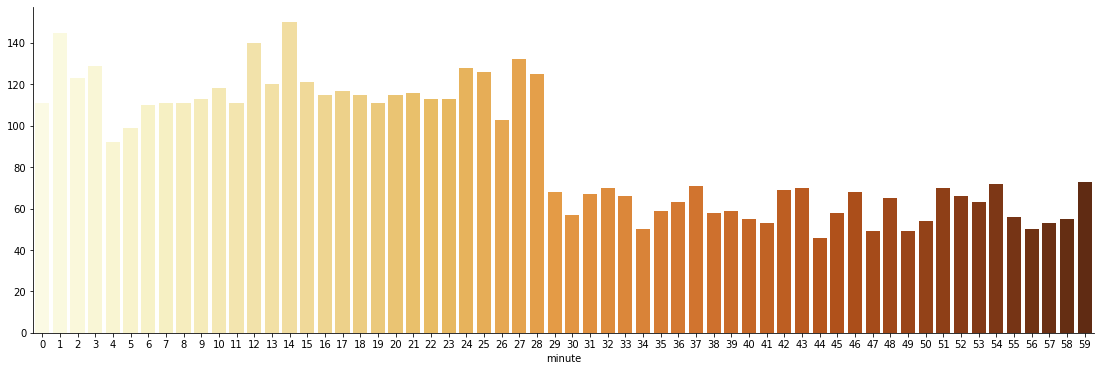

In [23]:
plt.figure(figsize=(19, 6))
sns.barplot(x=tr_by_minutes.index, 
            y=tr_by_minutes.array,
            palette='YlOrBr')
sns.despine();

There’s a clear advantage of values in the first half...

In [24]:
df_2.sample(n=5)

,date,name,transaction,minute
3493,2020-03-02 00:09:59,Irina_Smirnova,successfull,9
3816,2020-03-02 00:15:39,Olga_Petrova,cancelled,15
112,2020-03-02 00:14:09,Svetlana_Smirnova,successfull,14
130,2020-03-02 00:16:41,Vasilisa_Petrova,cancelled,16
4532,2020-03-02 01:14:10,Julia_Fedorova,successfull,14


As can be noted in the data received (`data/transaction_data_updated.csv`), minutes have just been ripped out of the date.
But for correct calculations we need the number of minutes from the beginning of the day (00:00:00).
Therefore, this needs to be fixed.

In [25]:
df_2.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [26]:
df_2['date'] = pd.to_datetime(df_2.date)

In [27]:
df_2.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [28]:
df_2['minute'] = df_2.date.dt.hour * 60 + df_2.date.dt.minute

In [29]:
df_2.sample(n=5)

,date,name,transaction,minute
1145,2020-03-02 00:50:31,Irina_Lesnova,successfull,50
3046,2020-03-02 01:13:09,Vasilisa_Fedorova,cancelled,73
5024,2020-03-02 00:14:03,Svetlana_Ozerova,cancelled,14
3381,2020-03-02 00:04:27,Ekaterina_Polyanova,successfull,4
2374,2020-03-02 00:02:49,Vasilisa_Petrova,successfull,2


Well, and now it's time to refresh barplot:

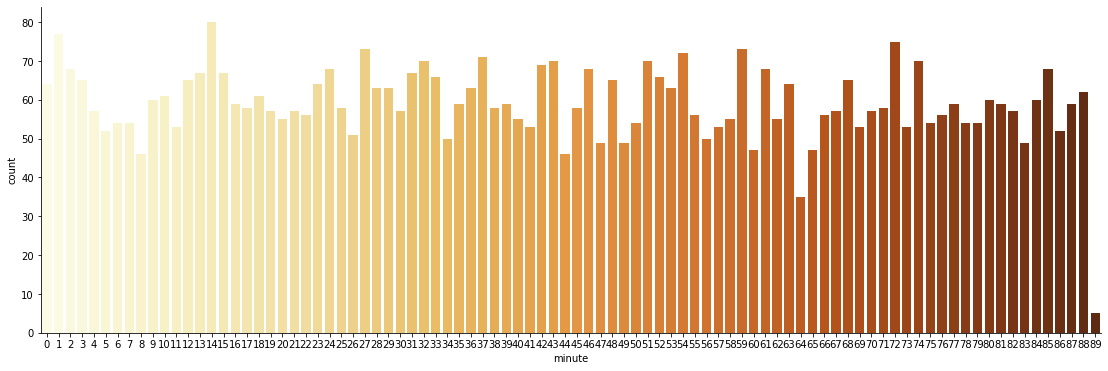

In [33]:
plt.figure(figsize=(19, 6))
sns.countplot(x='minute',
              data=df_2,
              palette='YlOrBr')
sns.despine();

Now the transaction distribution is as even as it should be.